# Reproducing the model published in: A rapid inducible RNA decay system reveals fast mRNA decay in P-bodies

**Authors:**  Blake et al.

**Published:** 28 March 2024 in Nature Communications

**DOI:** [10.1038/s41467-024-46943-z](https://doi.org/10.1038/s41467-024-46943-z)


# RNA Decay Model in Cytoplasm and P-bodies

This Jupyter Notebook section presents a mathematical model simulating the decay and transfer dynamics of RNA within two compartments: the cytoplasm and P-bodies. The model addresses how RNA molecules transition between these compartments and undergo degradation. We solve the system using differential equations represented in the following model:

## Model Description

- $\frac{d[\text{RNA}_{CT}]}{dt} = -k_{cr} \times \text{RNA}_{CT} - k_r \times \text{RNA}_{CT} + k_l \times \text{RNA}_{PB}$
- $\frac{d[\text{RNA}_{PB}]}{dt} = -k_{pb} \times \text{RNA}_{PB} + k_r \times \text{RNA}_{CT} - k_l \times \text{RNA}_{PB}$

Where:
- $\text{RNA}_{CT}$: Concentration of RNA in the cytoplasm.
- $\text{RNA}_{PB}$: Concentration of RNA in P-bodies.
- $k_{cr}$: Degradation rate of RNA in the cytoplasm.
- $k_{r}$: Rate of RNA moving from cytoplasm to P-body.
- $k_{pb}$: Degradation rate of RNA in P-body.
- $k_{l}$: Rate of RNA moving from P-body back to the cytoplasm, assumed to be zero in this model.

The initial conditions and parameters used for simulation are as follows:
- Initial RNA in cytoplasm: 1800 molecules/cell
- Initial RNA in P-bodies: 0 molecules/cell
- Time span of simulation: 0 to 120 minutes
- Time points for experimental comparison: [0, 10, 15, 20, 30, 60, 120] minutes


In [1]:
%%capture
! pip install scipy

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

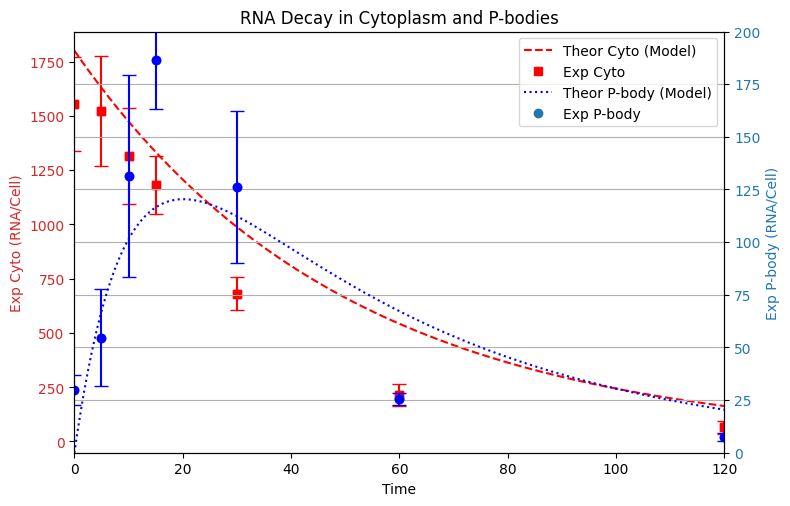

In [4]:
# Define the system of differential equations
def model(y, t, k_ct, k_r, k_pb, k_l):
    RNA_CT, RNA_PB = y
    dRNA_CT_dt = -k_ct * RNA_CT - k_r * RNA_CT + k_l * RNA_PB
    dRNA_PB_dt = -k_pb * RNA_PB + k_r * RNA_CT - k_l * RNA_PB
    return [dRNA_CT_dt, dRNA_PB_dt]

# Initial conditions
RNA_CT0 = 1800  # initial cytoplasmic RNA
RNA_PB0 = 0     # initial P-body RNA
y0 = [RNA_CT0, RNA_PB0]

# Time points
t = np.linspace(0, 120, 400)  # Extended time for a better comparison with the experimental data

# Parameters
k_ct = 0.01  # degradation rate of RNA in cytoplasm
k_r = 0.01  # rate of RNA moving from cytoplasm to P-body
k_pb = 0.1  # degradation rate of RNA in P-body
k_l = 0      # rate of RNA moving from P-body back to cytoplasm is zero

# Solve ODE
solution = odeint(model, y0, t, args=(k_ct, k_r, k_pb, k_l))
# Time points

# Aproximate experimental data extracted from the paper figure 3 panels C, D, E.
time_points = [0,	5,	10,	15,	30,	60,	120]
# Experimental Cytoplasmic RNA values for panels C, D, E
exp_cyto = [1552.5,	1522.5,	1314.75,	1181.75,	680.25,	214.5,	66.33333333]
# Experimental P-body RNA values for panels C, D, E
exp_pbody = [29.75,	54.5,	131.5,	186.25,	126.065,	25.5,	7.333333333]

std_cyto = [217,	253,	221,	133,	76,	52,	30]
std_pbody = [7,	23,	48,	23,	36,	3,	2]


# Create a plot with two y-axes
fig, ax1 = plt.subplots(figsize=(8, 5))

color = 'tab:red'
ax1.set_xlabel('Time')
ax1.set_ylabel('Exp Cyto (RNA/Cell)', color=color)
ax1.plot(t, solution[:, 0], 'r--', label='Theor Cyto (Model)')  # Theoretical Cytoplasmic RNA
ax1.tick_params(axis='y', labelcolor=color)
ax1.plot(time_points, exp_cyto, 's', color='r',label='Exp Cyto')
ax1.errorbar(time_points, exp_cyto, yerr=std_cyto, fmt='s', color='r', capsize=5)

ax2 = ax1.twinx()  # Instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Exp P-body (RNA/Cell)', color=color)
ax2.plot(t, solution[:, 1], 'b:', label='Theor P-body (Model)')  # Theoretical P-body RNA
ax2.tick_params(axis='y', labelcolor=color)
# maximum value of the y-axis is set to 200
ax2.set_ylim(0, 200)
ax2.set_xlim(0, 120)
ax2.plot(time_points, exp_pbody, 'o', label='Exp P-body')
ax2.errorbar(time_points, exp_pbody, yerr=std_pbody, fmt='o', color='b', capsize=5)


fig.tight_layout()  # Otherwise the right y-label is slightly clipped
fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.title('RNA Decay in Cytoplasm and P-bodies')
plt.grid(True)
plt.show()

## Chi-Squared ($\chi^2$) 

The chi-squared ($\chi^2$) statistic is a measure used in statistics to assess the goodness of fit between observed data and a model. It is calculated as the sum of the squared differences between observed and expected values, each divided by the expected value:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

where:
- $O_i$ represents the observed values,
- $E_i$ represents the expected values under the model.

The $\chi^2$ statistic helps determine how well the model describes the data. A lower $\chi^2$ value indicates a better fit, whereas a higher value suggests a poorer fit. This measure is widely used in hypothesis testing, particularly in the context of goodness-of-fit tests and contingency tables.

##  Chi-Squared ($\chi^2_{\text{red}}$) 

The reduced chi-squared, $\chi^2_{\text{red}}$, is a statistical measure used to evaluate the goodness of fit of a model to observed data. It is computed by dividing the chi-squared statistic, $\chi^2$, by the degrees of freedom (dof), which is the number of data points minus the number of fitted parameters.

$$\chi^2_{\text{red}} = \frac{\chi^2}{\text{dof}}$$

A $\chi^2_{\text{red}}$ value close to 1 suggests that the fit is appropriate to the data, assuming the model errors are normally distributed. Values significantly greater than 1 indicate a poor fit, while values much less than 1 suggest overfitting.

In [12]:
# # Interpolating the theoretical data to match the experimental data points
interpolate_cyto = interp1d(t, solution[:, 0], kind='cubic')
interpolate_pbody = interp1d(t, solution[:, 1], kind='cubic')

# # Now evaluate these functions at the time points of the experimental data
interpolated_cyto = interpolate_cyto(time_points)
interpolated_pbody = interpolate_pbody(time_points)

## Define the R-squared function
def r_squared(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    residuals = y_true - y_pred
    ss_res = np.sum(residuals**2)  # Sum of squares of residuals
    ss_tot = np.sum((y_true - np.mean(y_true))**2)  # Total sum of squares
    r2 = 1 - (ss_res / ss_tot)
    return r2

# Define the reduced chi-squared function
def reduced_chi_squared(y_true, y_pred, num_params):
    chi_squared = r_squared(y_true, y_pred)
    dof = len(y_true) - num_params  # Degrees of freedom
    chi_squared_red = chi_squared / dof  # Reduced chi-squared
    return chi_squared_red

# Calculate reduced chi-squared for the theoretical and experimental data
chi2_red_cyto = reduced_chi_squared(exp_cyto, interpolated_cyto, num_params=3)
chi2_red_pbody = reduced_chi_squared(exp_pbody, interpolated_pbody, num_params=3)

print(f'Reduced chi-squared for cytoplasmic RNA: {chi2_red_cyto:.2f}')
print(f'Reduced chi-squared for P-body RNA: {chi2_red_pbody:.2f}')

# Calculate R^2 for the theoretical and experimental data
r2_cyto = r_squared(exp_cyto, interpolated_cyto)
r2_pbody = r_squared(exp_pbody, interpolated_pbody)

print(f'R^2 for cytoplasmic RNA: {r2_cyto:.2f}')
print(f'R^2 for P-body RNA: {r2_pbody:.2f}')

Reduced chi-squared for cytoplasmic RNA: 0.23
Reduced chi-squared for P-body RNA: 0.16
R^2 for cytoplasmic RNA: 0.90
R^2 for P-body RNA: 0.63
